In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt
from flask import jsonify
%matplotlib inline

# Import Tables with sqlite3 as Alchemy is not a requirement

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlite3


In [3]:
 #connect
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()

# Exploratory Climate Analysis

In [4]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Find the highest date in the DB
cur.execute("SELECT MAX(date) FROM measurement")
max_date=cur.fetchall()
#Convert to a string
date_str=max_date[0][0]
#Convert to a date format
date_dt=dt.strptime(date_str,'%Y-%m-%d')
#Subtract a year to find the date for the query
new_date=date_dt.replace(date_dt.year-1)
#convert back to string
new_str=new_date.strftime('%Y-%m-%d')

# Select the date and precipitaiton level from the db
cur.execute(f"SELECT date, prcp FROM measurement WHERE date > '{new_str}'")
rows=cur.fetchall()

#Make a dataframe
climate_df=pd.DataFrame(data=rows, columns=["Date","Precipitation"])
climate_df.set_index("Date",inplace=True)
climate_df.sort_index(ascending=True,inplace=True)
#I've made the decision to intrepet nulls as 0s
climate_df.fillna(value=0, inplace=True)

# Make a group by dataframe for use in a graph
climate_group=climate_df.groupby("Date").max()

#Show the grouped data
climate_group.head()

,Precipitation
Date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07


<Figure size 432x288 with 0 Axes>

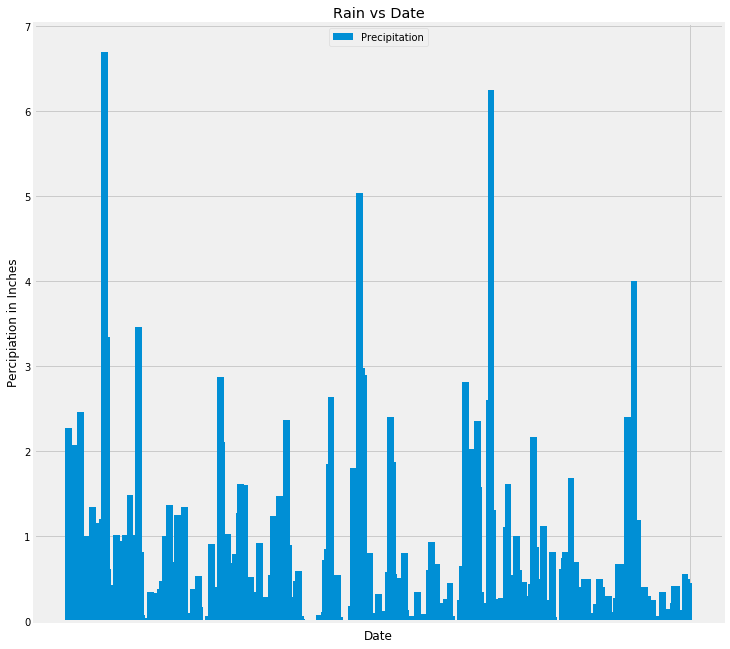

In [5]:
#Make a bar graph
plt.figure(1)
plt.figure(figsize=(11,11))
plt.bar(climate_group.index,climate_group["Precipitation"], width=4)

# Add title and labels
plt.ylabel('Percipiation in Inches')
plt.xlabel('Date')
plt.title("Rain vs Date")

#Remove the xticks on the bottom
plt.xticks('')

plt.legend(["Precipitation"],loc=9)

plt.show()

In [6]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [7]:
# Design a query to show how many stations are available in this dataset?
cur.execute(f"SELECT COUNT(DISTINCT station) FROM measurement")
cur.fetchall()

[(9,)]

In [8]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
cur.execute(f"SELECT station, COUNT(*) FROM measurement GROUP BY station ORDER BY COUNT(*) DESC")
cur.fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [9]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_station="USC00519281"
cur.execute(f"SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE station='{active_station}'")
cur.fetchall()

[(54.0, 85.0, 71.66378066378067)]

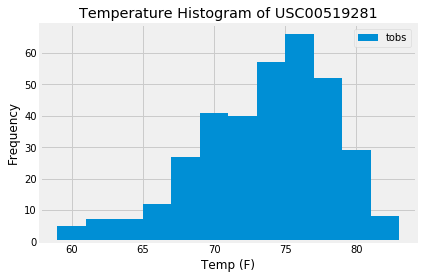

In [10]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cur.execute(f"SELECT date, tobs FROM measurement WHERE date > '{new_str}' AND station='{active_station}'")
rows=cur.fetchall()

temp_hist_df=pd.DataFrame(rows, columns=["date","tobs"])

plt.hist(temp_hist_df["tobs"],bins=12)
plt.legend(["tobs"])

# Add title and labels
plt.ylabel('Frequency')
plt.xlabel('Temp (F)')
plt.title(f"Temperature Histogram of {active_station}")

plt.show()


# Choosing the Dates

## Precipitation 

### From veiwing the precipitation graph previously, it appears at the best time to go is late April or early May

### I will choose05-01 to 05-15

## Temperature

### I have decided that when to go doesn't truly affect the temperature by viewing the histogram.

### It all looks pretty pleasant in that range

# Flask Functions

This next area is a place where I can build and test functinons for the flask app

__Flask app is in ./flask_app/app.py__

# Testing code for /api/v1.0/precipitation/

In [11]:
# Function precipitaion for the following path:
# /api/v1.0/precipitation

#@app.route("/api/v1.0/precipitation/")
#def precipitation():
# connect to the db
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()
# select date and precipitation from the db
cur.execute("SELECT date, prcp FROM measurement")
result= cur.fetchall()
# create and add results into the dictionary
precip_dict= {}
{precip_dict.setdefault(key, []).append(precip) for key, precip in result}
#return(jsonify(precip_dict))



{None}

# Testing code for /api/v1.0/stations/

In [12]:
#@app.route("/api/v1.0/stations")
#def stations():
# connect to the db
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()
#select the station data
cur.execute("SELECT station, name, latitude, longitude, elevation FROM station")
results=cur.fetchall()
stations_list=[]
# add the results to a list of dictionaries
for result in results:
    stations_list.append(dict(station=result[0],name=result[1],lattitude=result[2],longitude=result[3],elevation=result[4]))
#    return jsonify(stations_list)




# Testing code for /api/v1.0/tob/

In [13]:
# Function precipitaion for the following path:
# /api/v1.0/tob

#@app.route("/api/v1.0/tob/")
#def tob():
conn = sqlite3.connect("./Resources/hawaii.sqlite")
cur = conn.cursor()

#Find the highest date in the DB
cur.execute("SELECT MAX(date) FROM measurement")
max_date=cur.fetchall()
#Convert to a string
date_str=max_date[0][0]
#Convert to a date format
date_dt=dt.strptime(date_str,'%Y-%m-%d')
#Subtract a year to find the date for the query
new_date=date_dt.replace(date_dt.year-1)
#convert back to string
new_str=new_date.strftime('%Y-%m-%d')

cur.execute(f"SELECT date, tobs FROM measurement WHERE date > '{new_str}'")
result= cur.fetchall()
tobs_dict= {}
{tobs_dict.setdefault(key, []).append(tobs) for key, tobs in result}
#return(jsonify(tobs_dict)

   


{None}

# Testing code for flask app /api/v1.0/&#x3C;start&#x3E;
    
    

In [14]:
# flask app for finding the temp statistics for several dates
#@app.route("/api/v1.0/<start>")
#Input for QA:
start=input()
#def temp_past(start):
try:
    ##This date conversion verifies that the url is properly formatted
    min_date=dt.strptime(start,'%Y-%m-%d')
    ## Connect to db
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur = conn.cursor()

    ## find min and max date on db
    cur.execute("SELECT MIN(date),MAX(date) FROM measurement")
    db_result=cur.fetchall()
    #Convert to a string
    min_str=db_result[0][0]
    max_str=db_result[0][1]

    # Check to see if the date ranges are out of bounds
    if start < min_str:
            results={"error": f"{start} is less than the earliest database date of {min_str}"}
    elif start > max_str:
            results={"error": f"{start} is greater than the latest database date of {max_str}"}
    else:
        #select the aggretate temperatures of the dates greater than start date
        cur.execute(f"SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE date >= {start}")
        temp_results=cur.fetchall()
        #format the results for the average of those dates
        results={"start":start,
                 "end":max_str,
                 "TMIN":temp_results[0][0],
                  "TMAX":temp_results[0][1],
                  "TAVG":"{0:.1f}".format(temp_results[0][2])}
#        return jsonify(results),200
except: 
        #return an error if there's a date typo
    results={"error": f"{start} is not date format of YYYY-MM-DD or an API path"}
#        return jsonify(results),404

# This line should be removed in flask file. it's to verify output
print(results)

 2017-05-01


{'start': '2017-05-01', 'end': '2017-08-23', 'TMIN': 53.0, 'TMAX': 87.0, 'TAVG': '73.2'}


# Testing code for flask app /api/v1.0/&#x3C;start&#x3E;/&#x3C;end&#x3E;
    
    

In [15]:
#@app.route("/api/v1.0/<start>/<end>")
#def temp_range(start,end):

#Testing  variables that will be removed from flask app
start=input()
end=input()


try:
    min_date=dt.strptime(start,'%Y-%m-%d')
    max_date=dt.strptime(end,'%Y-%m-%d')

    ## Connect to db
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur = conn.cursor()

    ## find min and max date on db
    cur.execute("SELECT MIN(date),MAX(date) FROM measurement")
    db_result=cur.fetchall()
    #Convert to a string
    min_str=db_result[0][0]
    max_str=db_result[0][1]

    # For date error handling, I have 3 categories, if the start is earlier than the 
    # first db date, if the end is greater than the last db date, and if the start is 
    # greater than the end.
    if start > end:
        results={"error":f"Start date {start} is greater than end date {end}."}
    elif start < min_str:
        results={"error": f"{start} is less than the earliest database date of {min_str}"}
    elif end > max_str:
        results={"error": f"{end} is greater than the latest database date of {max_str}"}
                
    else:
        # find min max and rage of temp for those dates
        cur.execute(f"SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE date >= '{start}' AND date <= '{end}' AND tobs IS NOT NULL")
        temp_results=cur.fetchall()
        # return the results
        results={"start":start,
                 "end":end,
                 "TMIN":temp_results[0][0],
                 "TMAX":temp_results[0][1],
                 "TAVG":"{0:.1f}".format(temp_results[0][2])
                  }
#        return jsonify(results),200
except: 
        #return an error if there's a date typo
    results={"error": f"{start} is not date format of YYYY-MM-DD or an API path"}
#        return jsonify(results),404

# This line should be removed in flask file. it's to verify output
results

 2017-05-01
 2017-05-15


{'start': '2017-05-01',
 'end': '2017-05-15',
 'TMIN': 65.0,
 'TMAX': 80.0,
 'TAVG': '75.2'}

In [16]:
# Creading a sqlite function instead of the alchemy one. It's close to the flask one.

def calc_temps(start_date,end_date):
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur = conn.cursor()
    cur.execute(f"SELECT MIN(tobs),MAX(tobs),AVG(tobs) FROM measurement WHERE date >= '{start_date}' AND date <= '{end_date}' AND tobs IS NOT NULL")
    temp_results=cur.fetchall()
    return temp_results

calc_temps('2017-05-01','2017-05-15')



[(65.0, 80.0, 75.23809523809524)]

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-05-01','2016-05-15')

[(65.0, 79.0, 73.08510638297872)]

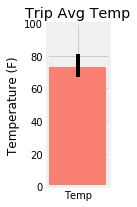

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
bar_data=calc_temps('2016-05-01','2016-05-15')

# I didn't read the peak to peak for the error, so I uhh, made it asymmetric, which is harder.
avg_temp=bar_data[0][2]
max_temp=bar_data[0][1]
min_temp=bar_data[0][0]
high_err=max_temp - avg_temp
low_err=avg_temp - min_temp

# This list of lists is the asymmetric error bars
error=[[high_err],[low_err]]


plt.bar("Temp",avg_temp, width=0.002, yerr=error,  color="salmon" )

plt.ylabel("Temperature (F)")
plt.ylim((0,100))
plt.rcParams["figure.figsize"]=(1,3)
plt.title("Trip Avg Temp")
plt.show()

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def station_rain(start_date, end_date):
    conn = sqlite3.connect("./Resources/hawaii.sqlite")
    cur.execute(f"SELECT round(sum(m.prcp),2) AS total_rain,m.station, s.name, s.latitude, s.elevation FROM measurement m, station s WHERE s.station=m.station AND date >= '{start_date}' AND date <= '{end_date}' GROUP BY m.station, s.name, s.latitude, s.elevation ORDER by total_rain DESC")
    rain_data=cur.fetchall()
    return rain_data

station_rain('2017-05-01','2017-05-15')


[(4.51, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, 152.4),
 (3.2, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, 32.9),
 (2.29, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, 14.6),
 (1.94, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, 7.0),
 (0.87, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, 19.5),
 (0.32, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, 3.0)]

# Looks like Waikiki it is!


## Optional Challenge Assignment

### I declined to do it. It also appears that the jupyter book doesn't match the instructions.

### I deleted the mismathing blocks out of the Notebook
